### Multiple Linear Regression on House Price Data

Continue to work on the House Price prediction problem from <strong>Demo 3- Regression on House Price Data</strong>, and perform the following activities:
			<ol>
				<li>Add lat and long as features to the list of features chosen</li>
				<li>Remove rows which contain outliers. Look for outliers in the price, bedrooms, bathrooms, sqft_living columns only. This is to remove houses that are a lot smaller/bigger than other houses in the data set.</li>
				<li>Consider the lat and long features added in (a) as categorical features as well. Encode all the categorical features using different approaches such as LabelEncoder, OneHotEncoder, etc.</li>
				<li>Split the data into train and test set in the ratio of 75:25.</li>
				<li>Build a model on the train data and evaluate its performance using adjusted R-squared and RMSE.</li>
				<li>Validate the model's performance on the test data using RMSE.</li>			
			</ol>
<b>Hint: </b>kc_house_data.csv file is present in <b>Exercises/data</b> folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house = pd.read_csv("data/kc_house_data.csv")

In [16]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/home/ubuntu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


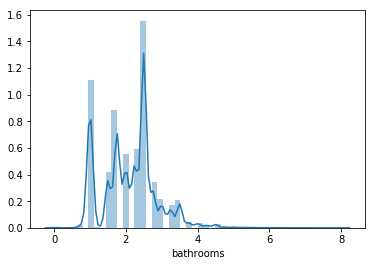

In [13]:
#checking outliers on Bathrooms

sns.distplot(house["bathrooms"], kde=True)

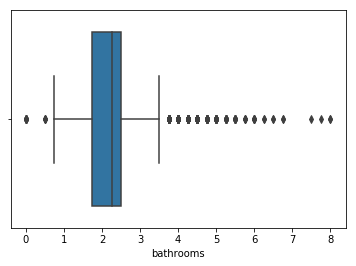

In [14]:
sns.boxplot(house["bathrooms"])

In [30]:
bath_ol = house[(house["bathrooms"]>=2) & (house["bathrooms"] <=3.5)]

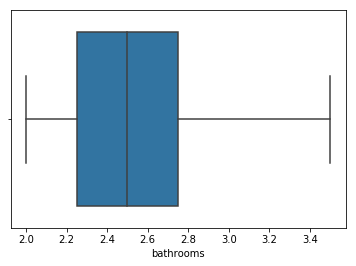

In [31]:
sns.boxplot(bath_ol["bathrooms"])

(array([1.500e+01, 5.730e+02, 5.286e+03, 5.350e+03, 1.188e+03, 1.730e+02,
        1.700e+01, 8.000e+00, 2.000e+00, 3.000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

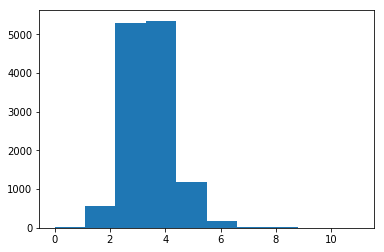

In [32]:
plt.hist(bath_ol["bedrooms"])

In [42]:
bath_ol.groupby("bedrooms").count()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573,573
3,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286
4,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350
5,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188
6,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
7,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [43]:
bed_ol = bath_ol[(bath_ol["bedrooms"]>=2) & (bath_ol["bedrooms"] <= 5)]

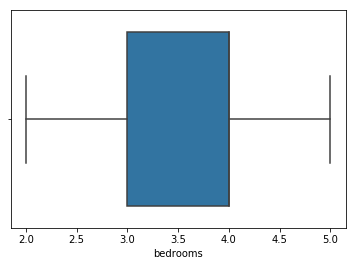

In [45]:
sns.boxplot(bed_ol["bedrooms"])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


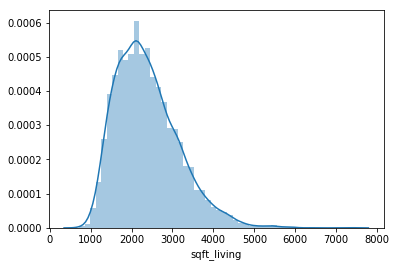

In [47]:
sns.distplot(bed_ol["sqft_living"])

In [49]:
sqft_ol = bed_ol[(bed_ol["sqft_living"]>1000) & (bed_ol["sqft_living"]<4000)]

(array([4.299e+03, 5.042e+03, 1.871e+03, 4.090e+02, 1.760e+02, 8.000e+01,
        2.300e+01, 1.700e+01, 6.000e+00, 4.000e+00]),
 array([ 133000.,  429700.,  726400., 1023100., 1319800., 1616500.,
        1913200., 2209900., 2506600., 2803300., 3100000.]),
 <a list of 10 Patch objects>)

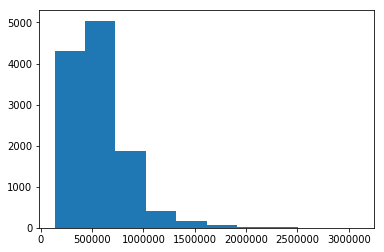

In [59]:
plt.hist(sqft_ol["price"])

In [60]:
house_cleaned = sqft_ol[(sqft_ol["price"]>1000) & (sqft_ol["price"]<1000000)]

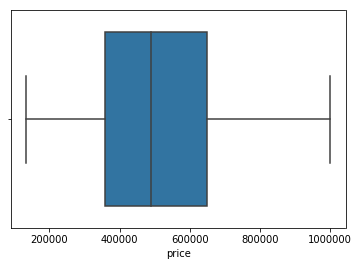

In [61]:
sns.boxplot(house_cleaned["price"])

In [5]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [142]:
X = house_cleaned[["bedrooms","bathrooms","sqft_living","floors","yr_built","lat","long"]]
y=house_cleaned["price"]

In [143]:
XEncoded = pd.get_dummies(X)

In [144]:
XEncoded.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built', 'lat',
       'long'],
      dtype='object')

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [146]:
xtrain, xtest, ytrain,ytest = train_test_split(XEncoded, y, test_size = 0.25, random_state = 100)

In [147]:
ytrain.shape

(8370,)

In [148]:
model = LinearRegression()

In [149]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
model.score(xtrain,ytrain)

0.5699923250723586

In [173]:
ypredtrain = model.predict(xtrain)
ypredtest = model.predict(xtest)
ypredtest = ypredtest.round(2)
ypredtrain = ypredtrain.round(2)

In [174]:
mean_squared_error(ytrain,ypredtrain)**0.5

125317.69114523944

In [175]:
mean_squared_error(ytest,ypredtest)**0.5

121785.44884603197